# IRIS FLOWER CLASSIFICATION

## Import the libriaries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## read the dataset

In [14]:
data=pd.read_csv('IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [17]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [18]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [20]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


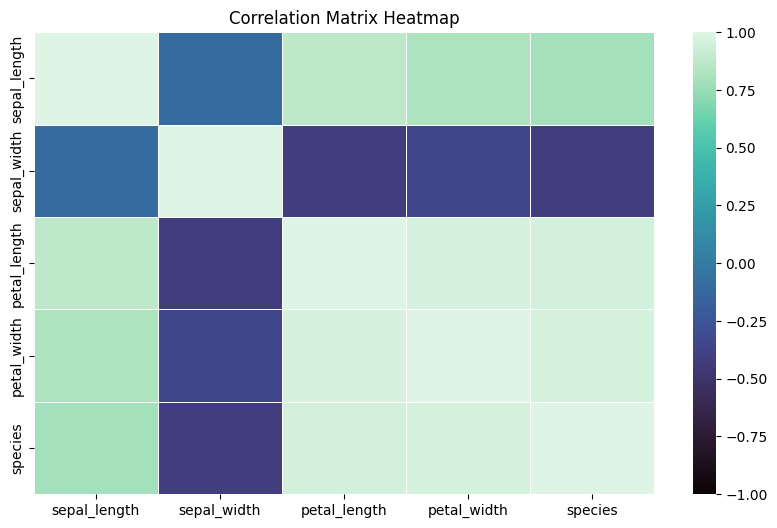

In [23]:
data['species'] = data['species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})
corr_mat=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat,cmap='mako',vmin=-1,vmax=1,annot=False,linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
data.corr()['species']

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

In [25]:
data.corr()['species'].drop('species')

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
Name: species, dtype: float64

In [26]:
df = data.drop(columns='sepal_width', axis=1)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

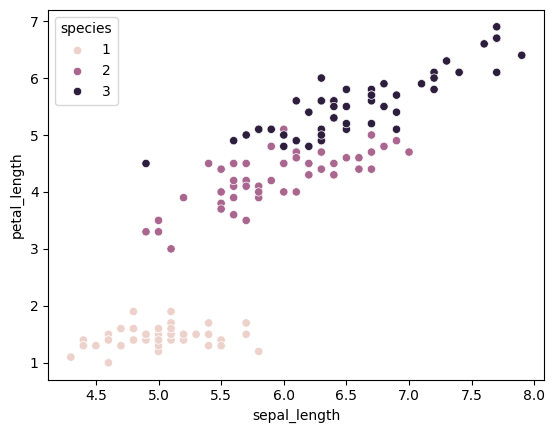

In [27]:
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')

In [28]:
df.head()

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,1
1,4.9,1.4,0.2,1
2,4.7,1.3,0.2,1
3,4.6,1.5,0.2,1
4,5.0,1.4,0.2,1


## Split the dataset

In [29]:
X = df.drop(columns='species', axis=1)
y = df['species']

In [31]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 3) (30, 3) (120,) (30,)


## Create and fit the model 

In [33]:
logistic_model = LogisticRegression()

In [34]:
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred=logistic_model.predict(X_test)

## Metrics Evaluation

In [36]:
print(f"classification report ")
print(classification_report(y_test,y_pred))

classification report 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.88      0.93         8
           3       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [41]:
print("Accuracy-score :",accuracy_score(y_test,y_pred)*100,"%")

Accuracy-score : 96.66666666666667 %


In [42]:
print(f"confusion  matrix ")
print(confusion_matrix(y_test,y_pred))

confusion  matrix 
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


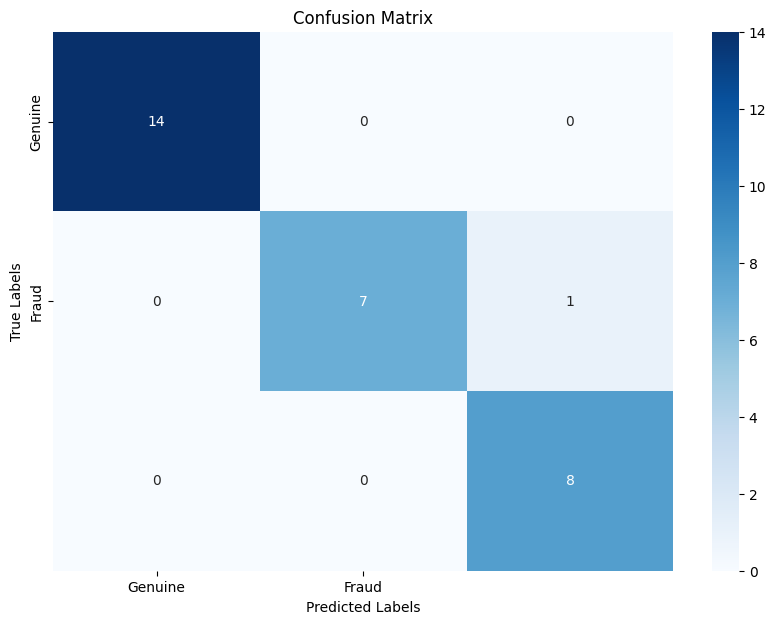

In [43]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fraud'], yticklabels=['Genuine', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()